# Iris classification
### Author: Bartosz Wnorowski

## Introduction

The aim of this notebook is to create the best model for iris flowers classification. All actions will be focused on given dataset.

We will start with getting a closer look at the dataframe. After that, if there will be a need for some data cleaning and processing we will do this to ensure better model's quality. And finally,  we will create classification model with methods that suit our case best.  

## Data preparation

In [30]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [31]:
df = pd.read_csv("IRISES.csv", sep="|")

In [32]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     149 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null object
Species         150 non-null object
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


As we can see above, there is one record with null value in the dataframe. We can abandon this row without loosing too much data. Also, Petal.Width feature needs to be transformed into numerical value.

In [34]:
df = df.dropna()
df['Petal.Width']=df['Petal.Width'].map(lambda x : x.replace(',','.'))
df['Petal.Width'] = df['Petal.Width'].apply(float)

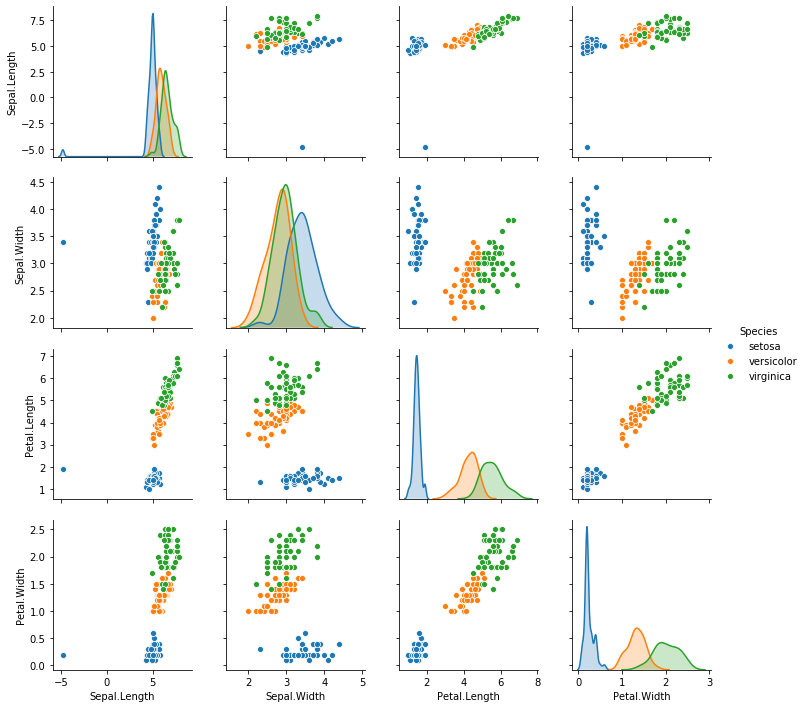

In [76]:
sns.pairplot(df, kind="scatter", hue = "Species")
plt.show()

One record is heavily distanced from the rest ones. We can assume that this is a wrong measurement and drop this row. As we don't have too many values in our dataset, dropping other outliers could be harmful for classification model. 

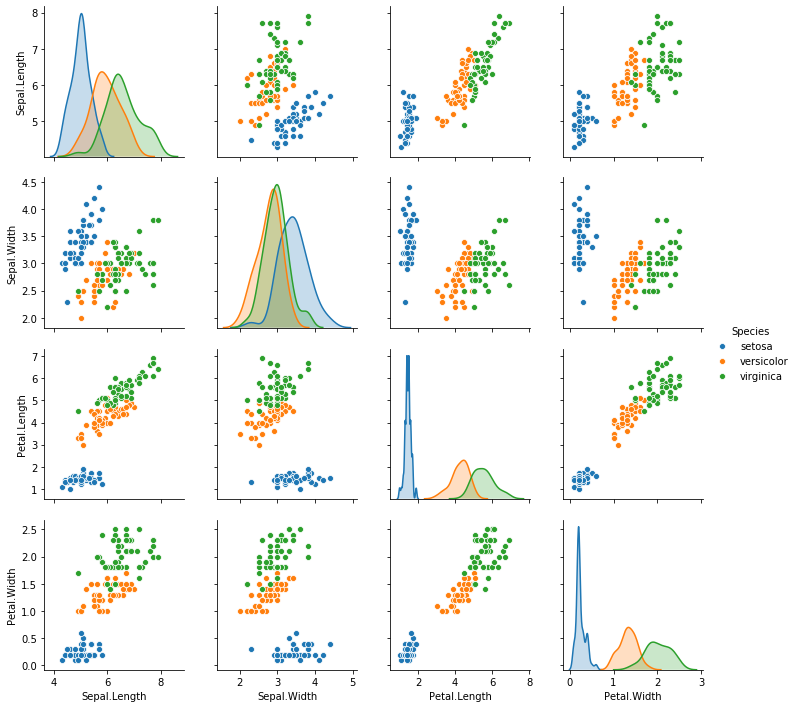

In [77]:
index = df['Sepal.Length'].idxmin()
df = df.drop(index)
sns.pairplot(df, kind="scatter", hue = "Species")
plt.show()

Analyzing the pairplot above, we can surely say that it will we no problem to distinguish setosa individuals from the rest of population. However, there can occure some difficulties with determining if flower is versicolor or virginica type. As there is only four features, creating new ones can be helpful in reaching this aim. Lets try SVM amongst other most popular classification techniques.

## Building a model
Having only 149 reconds in the dataset, it is hard to learn and test our model properly in the same time. Using cross validation can help to solve this problem, providing both good training and testing. We can do this and also automatize selection of model parameters by using GridSearchCV object.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [13]:
features = ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]

k_neighbours = np.arange(2,7)
param_grid = dict(n_neighbors=k_neighbours)

gridKNN = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=4, iid=False)
gridKNN.fit(df[features], df["Species"]) 

print("The best parameter: ", gridKNN.best_params_)
print("The best mean score: ", gridKNN.best_score_)

The best parameter:  {'n_neighbors': 5}
The best mean score:  0.9665429599640125


In [11]:
gridNB = GridSearchCV(GaussianNB(), param_grid = {}, cv=4, iid=False)
gridNB.fit(df[features], df["Species"]) 

print("The best mean score: ", gridNB.best_score_)

The best mean score:  0.9466093117408907


In [22]:
param_grid = {'kernel': ['poly', 'rbf'], 'gamma': np.arange(0.0,1.5,0.1), 'degree': [1, 2, 3], 'C': [0.5, 1, 1.5, 2]}

gridSVM = GridSearchCV(svm.SVC(),param_grid=param_grid,cv=4, iid=False)
gridSVM.fit(df[features], df["Species"]) 

print("The best set of parameters: ", gridSVM.best_params_)
print("The best mean score: ", gridSVM.best_score_)

The best set of parameters:  {'C': 1, 'degree': 1, 'gamma': 1.3, 'kernel': 'poly'}
The best mean score:  0.9800663517768781


## Conclusion
After some data preparation we have managed to create really good classification models. The best results achieved SVM model with linear kernel. Finishing with mean testing accuracy of 0.98 we can surely say that task is fully completed.